In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:

def  convertToMatrix(data,step):
  X,Y = [],[]
  for i in range(len(data) - step):
    d = i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)
step = 4
N = 1000
Tp = 800
t = np.arange(0,N)
x = np.sin(0.02*t) + 2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()


,0
0,1.545356
1,0.338140
2,1.286645
3,1.587559
4,0.900534


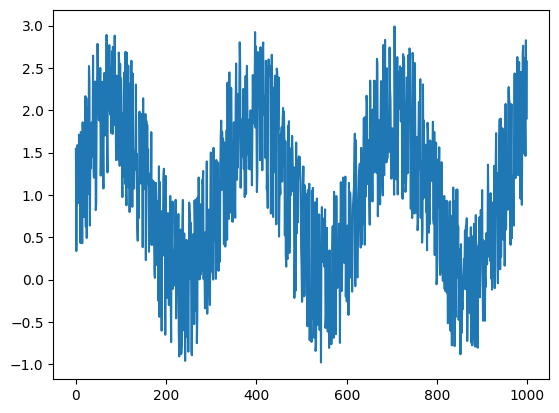

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
values = df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [ ]:
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1],step))

trainX,trainY = convertToMatrix(train,step)
testX,testY = convertToMatrix(test,step)
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1457 (5.69 KB)
Trainable params: 1457 (5.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
50/50 - 1s - loss: 0.6111 - 1s/epoch - 20ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4231 - 92ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4154 - 92ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4100 - 87ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4106 - 87ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 0.4060 - 86ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 0.4035 - 82ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.4013 - 81ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 0.3996 - 85ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 0.3983 - 89ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.3933 - 84ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.3957 - 84ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 0.3958 - 85ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.3923 - 111ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 0.3949 - 86ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.3899 - 85ms/epoch - 2ms/step
E

In [ ]:
trainPredict = model.predict(trainX)

25/25 [==============================] - 1s 3ms/step


In [ ]:
testPredict = model.predict(testX)

7/7 [==============================] - 0s 5ms/step


In [ ]:
predicted = np.concatenate((trainPredict, testPredict), axis = 0)

In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)

print(trainScore)

0.3397027254104614


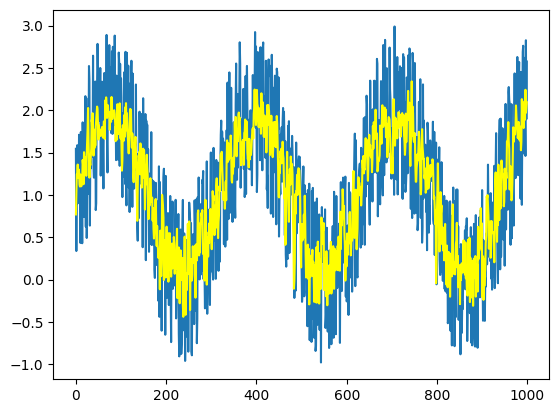

In [ ]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted, c="yellow")
plt.show()